# load libraries

In [1]:
import numpy as np
import pandas as pd
import glob

# import the Subject and Multisubject classes from `subject.py`

In [14]:
from subject import Subject
from subject import Multisubject

# get subject IDs
Find files matching `sub-*` in the model directory and save them in `ids`.

You could also skip this step and specify a specific subject(s) directly.

In [15]:
files=sorted(glob.glob("/Users/danicosme/Desktop/event/sub-*"))
ids = [i.lstrip('/Users/danicosme/Desktop/event/sub-') for i in files]
ids

['FP001', 'FP002']

# load data
Instantiate subjects in `ids`
* `id` = subject ID(s)
* `path` = path to model directory

In [16]:
subjects = [Subject(id=id, path='/Users/danicosme/Desktop/event') for id in ids]

# get contrast list
Get contrast information from one subject

In [17]:
subjects[1].contrasts

{'con_0001.nii': 'Contrast 1: No Choice Look > Rest - All Sessions',
 'con_0002.nii': 'Contrast 2: No Choice Regulate > Rest - All Sessions',
 'con_0003.nii': 'Contrast 3: Yes Choice Look > Rest - All Sessions',
 'con_0004.nii': 'Contrast 4: Yes Choice Regulate > Rest - All Sessions',
 'con_0005.nii': 'Contrast 5: Preview > Rest - All Sessions',
 'con_0006.nii': 'Contrast 6: Cue > Rest - All Sessions',
 'con_0007.nii': 'Contrast 7: Craving Rating > Rest - All Sessions',
 'con_0008.nii': 'Contrast 8: Difficulty Rating > Rest - All Sessions',
 'con_0009.nii': 'Contrast 9: Look > Rest - All Sessions',
 'con_0010.nii': 'Contrast 10: Regulate > Rest - All Sessions',
 'con_0011.nii': 'Contrast 11: No Choice > Rest - All Sessions',
 'con_0012.nii': 'Contrast 12: Yes Choice > Rest - All Sessions',
 'con_0013.nii': 'Contrast 13: Ratings > Rest - All Sessions',
 'con_0014.nii': 'Contrast 14: Regulate > Look - All Sessions',
 'con_0015.nii': 'Contrast 15: Yes Choice > No Choice - All Sessions',
 

In [18]:
subjects[1].betas

{'beta_0001.nii': 'spm_spm:beta (0001) - Sn(1) noChoiceLook*bf(1)',
 'beta_0002.nii': 'spm_spm:beta (0002) - Sn(1) noChoiceRegulate*bf(1)',
 'beta_0003.nii': 'spm_spm:beta (0003) - Sn(1) yesChoiceLook*bf(1)',
 'beta_0004.nii': 'spm_spm:beta (0004) - Sn(1) yesChoiceRegulate*bf(1)',
 'beta_0005.nii': 'spm_spm:beta (0005) - Sn(1) preview*bf(1)',
 'beta_0006.nii': 'spm_spm:beta (0006) - Sn(1) cue*bf(1)',
 'beta_0007.nii': 'spm_spm:beta (0007) - Sn(1) cravingRating*bf(1)',
 'beta_0008.nii': 'spm_spm:beta (0008) - Sn(1) difficultyRating*bf(1)',
 'beta_0009.nii': 'spm_spm:beta (0009) - Sn(1) R1',
 'beta_0010.nii': 'spm_spm:beta (0010) - Sn(1) R2',
 'beta_0011.nii': 'spm_spm:beta (0011) - Sn(1) R3',
 'beta_0012.nii': 'spm_spm:beta (0012) - Sn(1) R4',
 'beta_0013.nii': 'spm_spm:beta (0013) - Sn(1) R5',
 'beta_0014.nii': 'spm_spm:beta (0014) - Sn(2) noChoiceLook*bf(1)',
 'beta_0015.nii': 'spm_spm:beta (0015) - Sn(2) noChoiceRegulate*bf(1)',
 'beta_0016.nii': 'spm_spm:beta (0016) - Sn(2) yesChoic

# plot maps
Specify a regular expression pattern and plot contrasts or betas that match this pattern for all subjects in `subjects`

Use the following arguments:
* `pattern` = regular expression pattern
* `contrast` = True or False

There are two ways to iterate over subjects. You can use a loop as follows:

[None, None]

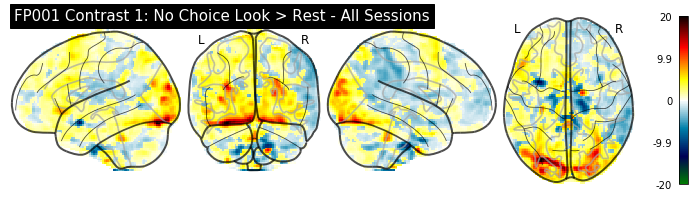

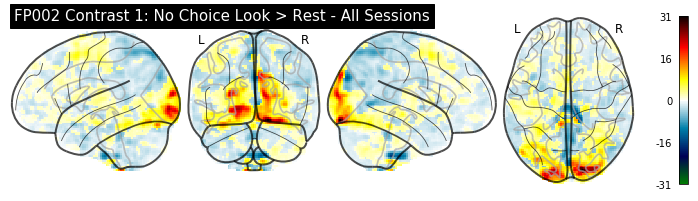

In [19]:
[sub.plot_data(pattern = "Contrast 1:", contrast = True) for sub in subjects]

Or you can define a `Multisubject` object to automatically iterate over subjects within a Multisubject object.

{'FP001': None, 'FP002': None}

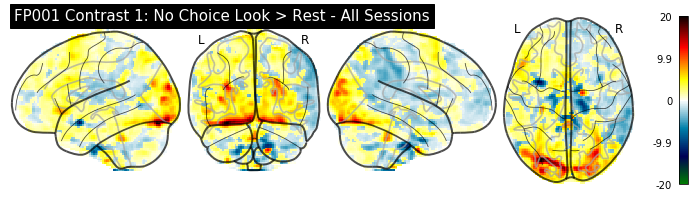

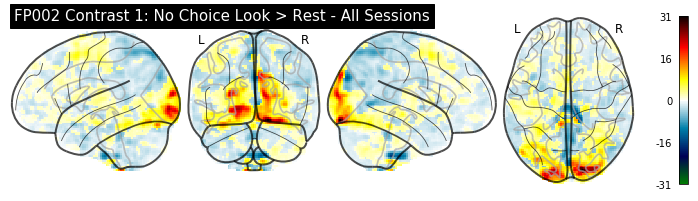

In [20]:
multisub = Multisubject(subjects=subjects)

multisub.plot_data(pattern = "Contrast 1:", contrast = True)

Using the `Multisubject` class also enables the user to plot specific subjects indexed either by position or id

{'FP001': None, 'FP002': None}

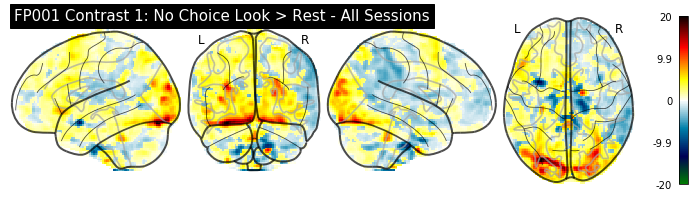

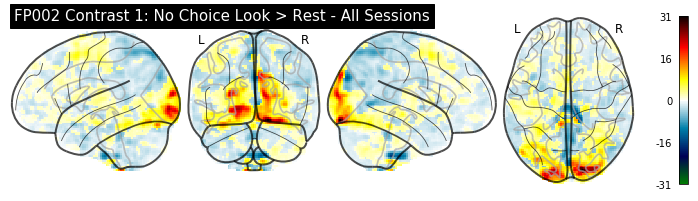

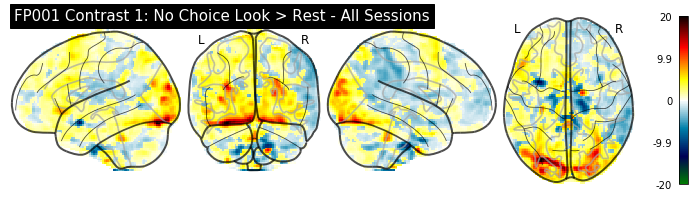

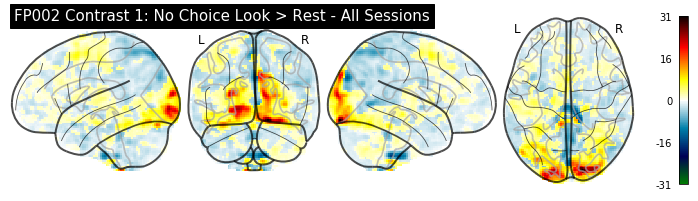

In [21]:
multisub[0:2].plot_data(pattern = "Contrast 1:", contrast = True)
multisub[['FP001', 'FP002']].plot_data(pattern = "Contrast 1:", contrast = True)

Make sure you correctly specify whether the pattern corresponds to contrast or beta images using `contrast = True/False`

In [27]:
multisub[['FP001', 'FP002']].plot_data(pattern = "Contrast 1:", contrast = False)

{'FP001': None, 'FP002': None}

Here's how you would correctly plot beta images

[None, None]

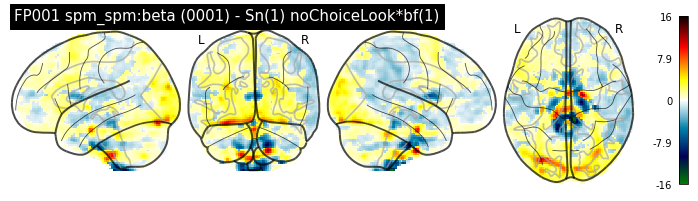

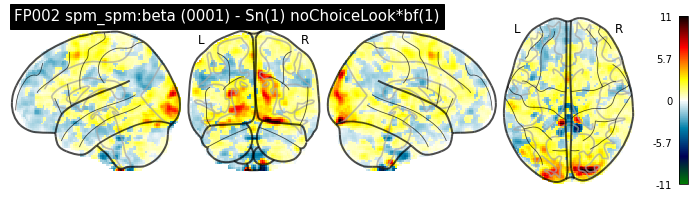

In [24]:
[sub.plot_data(pattern = "0001", contrast = False) for sub in subjects]

# print summary stats
Calculate summary stats (e.g., mean, SD, min, max) for each contrast image specified and subject

Arugments are positional as follows: pattern, contrast (True/False), functions

`pd.concat` renders the data as a pandas dataframe

In [25]:
pd.concat(multisub[['FP001', 'FP002']].apply_to_pattern("Craving Rating", True, np.mean, np.std, np.min, np.max))

,,id,filename,contrast,mean,std,amin,amax
FP001,0,FP001,con_0007.nii,Contrast 7: Craving Rating > Rest - All Sessions,-0.143375,2.191503,-19.178230,23.383509
FP002,0,FP002,con_0007.nii,Contrast 7: Craving Rating > Rest - All Sessions,1.061200,5.309083,-32.227547,53.107422


In [26]:
pd.concat(multisub[['FP001', 'FP002']].apply_to_pattern("beta", False, np.mean, np.std, np.min, np.max))

id       filename  \
FP001 0   FP001  beta_0001.nii   
      1   FP001  beta_0002.nii   
      2   FP001  beta_0003.nii   
      3   FP001  beta_0004.nii   
      4   FP001  beta_0005.nii   
      5   FP001  beta_0006.nii   
      6   FP001  beta_0007.nii   
      7   FP001  beta_0008.nii   
      8   FP001  beta_0009.nii   
      9   FP001  beta_0010.nii   
      10  FP001  beta_0011.nii   
      11  FP001  beta_0012.nii   
      12  FP001  beta_0013.nii   
      13  FP001  beta_0014.nii   
      14  FP001  beta_0015.nii   
      15  FP001  beta_0016.nii   
      16  FP001  beta_0017.nii   
      17  FP001  beta_0018.nii   
      18  FP001  beta_0019.nii   
      19  FP001  beta_0020.nii   
      20  FP001  beta_0021.nii   
      21  FP001  beta_0022.nii   
      22  FP001  beta_0023.nii   
      23  FP001  beta_0024.nii   
      24  FP001  beta_0025.nii   
      25  FP001  beta_0026.nii   
      26  FP001  beta_0027.nii   
      27  FP001  beta_0028.nii   
FP002 0   FP002  beta_0001.nii   
      1   FP002  beta_0002.nii   
...         ...            ...   
      12  FP002  beta_0013.nii   
      13  FP002  beta_0014.nii   
      14  FP002  beta_0015.nii   
      15  FP002  beta_0016.nii   
      16  FP002  beta_0017.nii   
      17  FP002  beta_0018.nii   
      18  FP002  beta_0019.nii   
      19  FP002  beta_0020.nii   
      20  FP002  beta_0021.nii   
      21  FP002  beta_0022.nii   
      22  FP002  beta_0023.nii   
      23  FP002  beta_0024.nii   
      24  FP002  beta_0025.nii   
      25  FP002  beta_0026.nii   
      26  FP002  beta_0027.nii   
      27  FP002  beta_0028.nii   
      28  FP002  beta_0029.nii   
      29  FP002  beta_0030.nii   
      30  FP002  beta_0031.nii   
      31  FP002  beta_0032.nii   
      32  FP002  beta_0033.nii   
      33  FP002  beta_0034.nii   
      34  FP002  beta_0035.nii   
      35  FP002  beta_0036.nii   
      36  FP002  beta_0037.nii   
      37  FP002  beta_0038.nii   
      38  FP002  beta_0039.nii   
      39  FP002  beta_0040.nii   
      40  FP002  beta_0041.nii   
      41  FP002  beta_0042.nii   

                                                       beta          mean  \
FP001 0      spm_spm:beta (0001) - Sn(1) noChoiceLook*bf(1)  1.100659e-01   
      1   spm_spm:beta (0002) - Sn(1) noChoiceRegulate*b...  4.539853e-01   
      2     spm_spm:beta (0003) - Sn(1) yesChoiceLook*bf(1)  2.404821e-01   
      3   spm_spm:beta (0004) - Sn(1) yesChoiceRegulate*...  3.762958e-01   
      4           spm_spm:beta (0005) - Sn(1) preview*bf(1)  4.926303e-01   
      5               spm_spm:beta (0006) - Sn(1) cue*bf(1)  7.807076e-01   
      6     spm_spm:beta (0007) - Sn(1) cravingRating*bf(1) -3.530310e-01   
      7   spm_spm:beta (0008) - Sn(1) difficultyRating*b...  7.758538e-01   
      8                      spm_spm:beta (0009) - Sn(1) R1  3.491033e-01   
      9                      spm_spm:beta (0010) - Sn(1) R2 -1.000797e-01   
      10                     spm_spm:beta (0011) - Sn(1) R3 -2.861128e+00   
      11                     spm_spm:beta (0012) - Sn(1) R4 -3.592087e+00   
      12                     spm_spm:beta (0013) - Sn(1) R5 -1.206735e+00   
      13     spm_spm:beta (0014) - Sn(2) noChoiceLook*bf(1)  1.786391e-01   
      14  spm_spm:beta (0015) - Sn(2) noChoiceRegulate*b...  7.990430e-02   
      15    spm_spm:beta (0016) - Sn(2) yesChoiceLook*bf(1)  1.946132e-01   
      16  spm_spm:beta (0017) - Sn(2) yesChoiceRegulate*... -6.654179e-03   
      17          spm_spm:beta (0018) - Sn(2) preview*bf(1)  1.244083e-01   
      18              spm_spm:beta (0019) - Sn(2) cue*bf(1)  8.323298e-01   
      19    spm_spm:beta (0020) - Sn(2) cravingRating*bf(1)  2.096562e-01   
      20  spm_spm:beta (0021) - Sn(2) difficultyRating*b... -3.243135e-02   
      21                     spm_spm:beta (0022) - Sn(2) R1  8.035855e-01   
      22                     spm_spm:beta (0023) - Sn(2) R2  2.089538e-01   
      23                     spm_spm:beta (0024) - Sn(2)